Exploratory data analysis for kiva historical loans dataset 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path 

%matplotlib inline 

In [2]:
INPUT_PATH = Path('../../data/kiva/kiva_loans.csv') 

In [3]:
df = pd.read_csv(INPUT_PATH) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666977 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [5]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Interested in the segmentation of load type, we appear to have three levels

* activity 
* sector
* use (free text) 

Can we modify the taxonomy to make it more/less granular, by using a standardised version of the free text.

In [6]:
print('Distinct sector:', df.sector.nunique())
print('Distinct activity:', df.activity.nunique())
print('Distinct use:', df.use.nunique())

Distinct sector: 15
Distinct activity: 163
Distinct use: 424913


In [7]:
df.sector.value_counts()

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

In [8]:
df.activity.value_counts()

Farming                           72955
General Store                     64729
Personal Housing Expenses         32448
Food Production/Sales             28106
Agriculture                       27023
Pigs                              26624
Retail                            24771
Clothing Sales                    22339
Home Appliances                   20267
Higher education costs            19742
Fruits & Vegetables               16610
Grocery Store                     15102
Livestock                         13095
Fish Selling                      13060
Food                              10197
Fishing                           10066
Services                           9807
Poultry                            9783
Tailoring                          9657
Animal Sales                       9237
Food Stall                         8905
Sewing                             8414
Dairy                              7914
Cereals                            7898
Cattle                             7865


In [9]:
df.use.value_counts() 

to buy a water filter to provide safe drinking water for their family.                                                                         5217
to buy a water filter to provide safe drinking water for her family.                                                                           4082
To buy a water filter to provide safe drinking water for their family.                                                                         2141
to build a sanitary toilet for her family.                                                                                                     1708
to build a sanitary toilet for her family                                                                                                      1599
to buy ingredients for her food production business                                                                                            1419
to purchase more groceries to sell.                                                                             

We can clearly see that whilst there are a large number of distinct "use", there is some duplication, probably when defining the loan use there are some suggestions made to the lender based on other "similar" loans, or the partner company setup many similar loans and use the same free text. 

Despite that, there are still some subtle differences between "use" which are actually equivalent with some basic text normalization (removing upper-case characters, punctuation) to reduce the number of distinct cases.

In [20]:
df['use_len'] = df.use.str.len() 

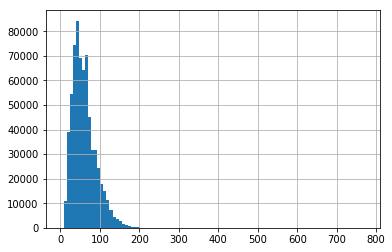

In [21]:
df.use_len.hist(bins=100) 
plt.show()

The normal range appears to be between 0-200 characters, but there are some outliers, taking a closer look at these. 

In [22]:
long_use = df.loc[df.use_len > 200] 

In [23]:
print(f'There are {len(long_use)} "outliers"') 

There are 387 "outliers"


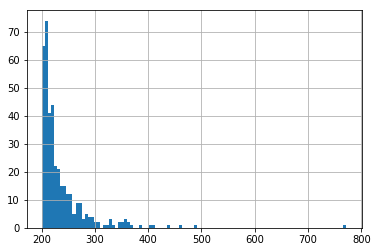

In [24]:
long_use.use_len.hist(bins=100) 
plt.show() 

In [28]:
long_use.sort_values('use_len', ascending=False).use.head().values

array([ ' in the purchasing of best selling items currently out of stock due to no/low funds I will be able to introduce a steady flow of new merchandise and react to any "new/IT" items in the industry and offer my clients the same or like items at better prices than the major retailers/specialty stores. It will allow me to plan purchases by category and be able to react to consumer and market needs.This loan will allow me to have a bigger presence online, in social media ads and at trade fairs/shows and will help me build my brand, Lily\'s Clothiers. I will be able to buy into new categories at a higher margin which in turn, will help elevate my price points and propel me into another realm of the business - I can finally compete with local and online boutique retailers.',
       'To pay for the spare parts and maintenance of their tricycle unit.                                                                                                                                             

Some of the longer texts are genuinely more descriptive, some are just full of punctuation.

Will now take a look at the cases where there are very short "use" texts. 

In [40]:
short_use = df.loc[df.use_len < 15] 

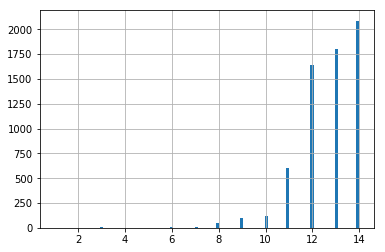

In [41]:
short_use.use_len.hist(bins=100) 
plt.show() 

There are a large number of "use" with short texts, will take a look at some examples of different lengths. 

In [49]:
df.loc[:, ['use_len', 'use', 'activity', 'sector']].sort_values('use_len').head(100)

,use_len,use,activity,sector
133466,1.0,.,Agriculture,Agriculture
121644,1.0,,Fish Selling,Food
252967,1.0,x,Services,Services
249358,2.0,--,Services,Services
187286,3.0,n/a,Technology,Services
211047,3.0,n/a,Food Production/Sales,Food
77120,3.0,n/a,Technology,Services
208234,3.0,n/a,Clothing,Clothing
138115,4.0,none,Property,Housing
376743,5.0,cows.,Cattle,Agriculture


Some interesting results here. Clearly the shortest texts are just null values, but the rest are simply detailing a very specific purchase/need so this is useful data. There are some which will not be helpful in determining the use case, for example 'to buy'. It appears in this case that some information has been redacted? But in some of these cases we can still infer the purchase by looking at the "activity". 

Also note the non-English 'buy' where "use" = 'Acheter'. Having multiple languages in our data is something to be wary of going forward. 